In [1]:
import numpy as np
import matplotlib.pyplot as plt
x_real_sh = list()
y_real_sh = list()
z_real_sh = list()

roll_real_sh = list()
pitch_real_sh = list()
yaw_real_sh = list()

x_v = list()
y_v = list()
z_v = list()

t_r = list()
for i in open("/dev/shm/vs_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_r.append(float(data[0]))
    x_real_sh.append(float(data[1]))
    y_real_sh.append(float(data[2]))
    z_real_sh.append(float(data[3]))
    
    roll_real_sh.append(float(data[4]))
    pitch_real_sh.append(float(data[5]))
    yaw_real_sh.append(float(data[6]))

    
    
x_real_unsh = list()
z_real_unsh = list()
y_real_unsh = list()
roll_real_unsh = list()
pitch_real_unsh = list()
yaw_real_unsh = list()


t_s = list()

for i in open("/dev/shm/a_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_s.append(float(data[0]))
    x_real_unsh.append(float(data[1]))
    y_real_unsh.append(float(data[2]))
    z_real_unsh.append(float(data[3]))
    
    roll_real_unsh.append(float(data[4]))
    pitch_real_unsh.append(float(data[5]))
    yaw_real_unsh.append(float(data[6]))


x_kf = list()
t_kf = list()    
z_kf = list()
y_kf = list()

for i in open("/dev/shm/predicted_pose.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_kf.append(float(data[0]))
    x_kf.append(float(data[1]))
    y_kf.append(float(data[2]))
    z_kf.append(float(data[3]))

x_ee = list()
t_ee = list()
z_ee = list()
y_ee = list()

roll_ee = list()
pitch_ee = list()
yaw_ee = list()

    
for i in open("/dev/shm/real_pose.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_ee.append(float(data[0]))
    x_ee.append(float(data[1]))
    y_ee.append(float(data[2]))
    z_ee.append(float(data[3]))
    
    roll_ee.append(float(data[4]))
    pitch_ee.append(float(data[5]))
    yaw_ee.append(float(data[6]))

    
x_d = list()
t_d = list()
z_d = list()
y_d = list()

roll_d = list()
pitch_d = list()
yaw_d = list()

    
for i in open("/dev/shm/vs_data_actual_pos.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_d.append(float(data[0]))
    x_d.append(float(data[1]))
    y_d.append(float(data[2]))
    z_d.append(float(data[3]))
    #x_v.append(float(data[4]))
    #y_v.append(float(data[5]))
    #z_v.append(float(data[6]))
    roll_d.append(float(data[4]))
    pitch_d.append(float(data[5]))
    yaw_d.append(float(data[6]))

   


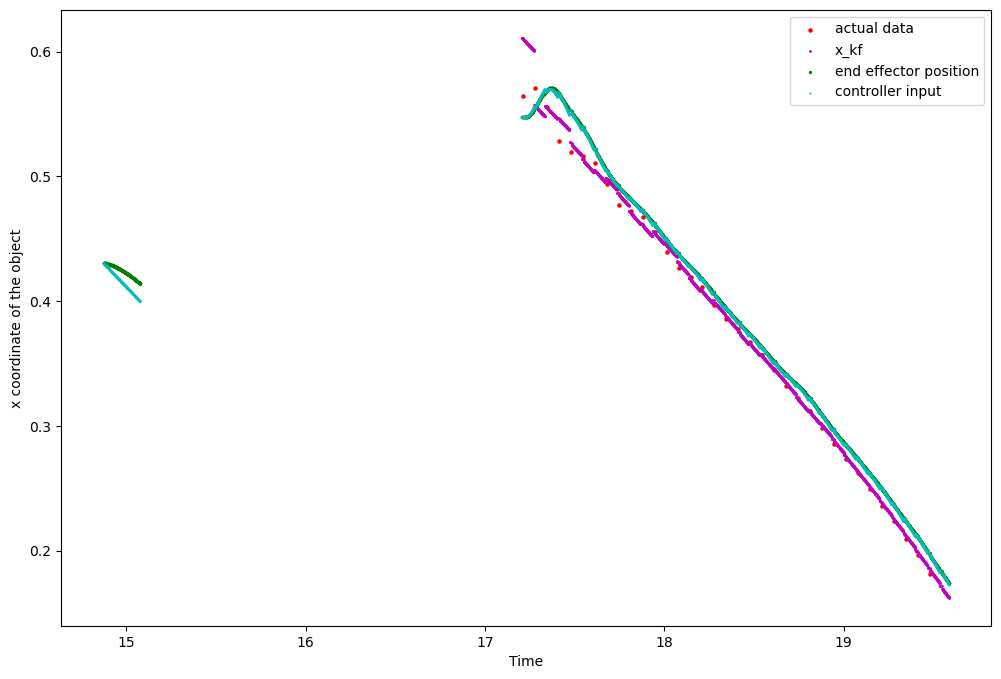

In [2]:
t_r = np.array(t_r)          
x_real_sh = np.array(x_real_sh)
y_real_sh = np.array(y_real_sh)
z_real_sh = np.array(z_real_sh)

roll_real_sh = np.array(roll_real_sh)
pitch_real_sh = np.array(pitch_real_sh)
yaw_real_sh = np.array(yaw_real_sh)



x_v = np.array(x_v)
y_v = np.array(y_v)
z_v = np.array(z_v)

t_s = np.array(t_s)          
x_real_unsh = np.array(x_real_unsh)
y_real_unsh = np.array(y_real_unsh)
z_real_unsh = np.array(z_real_unsh)

roll_real_unsh = np.array(roll_real_unsh)
pitch_real_unsh = np.array(pitch_real_unsh)
yaw_real_unsh = np.array(yaw_real_unsh)


t_kf = np.array(t_kf)          
x_kf = np.array(x_kf)
y_kf = np.array(y_kf)
z_kf = np.array(z_kf)


t_ee = np.array(t_ee)          
x_ee = np.array(x_ee)
y_ee = np.array(y_ee)
z_ee = np.array(z_ee)

roll_ee = np.array(roll_ee)
pitch_ee = np.array(pitch_ee)
yaw_ee = np.array(yaw_ee)


t_d = np.array(t_d)          
x_d = np.array(x_d)
y_d = np.array(y_d)
z_d = np.array(z_d)

roll_d = np.array(roll_d)
pitch_d = np.array(pitch_d)
yaw_d = np.array(yaw_d)



t_min = 0
t_max = 25



mask_sh = (t_r >= t_min) & (t_r < t_max)

t_r = t_r[mask_sh]
x_real_sh = x_real_sh[mask_sh]
y_real_sh = y_real_sh[mask_sh]
z_real_sh = z_real_sh[mask_sh]


roll_real_sh = roll_real_sh[mask_sh]
pitch_real_sh = pitch_real_sh[mask_sh]
yaw_real_sh = yaw_real_sh[mask_sh]


mask_unsh = (t_s < t_max) & (t_s >= t_min)
t_s = t_s[mask_unsh]
x_real_unsh = x_real_unsh[mask_unsh]
y_real_unsh = y_real_unsh[mask_unsh]
z_real_unsh = z_real_unsh[mask_unsh]


roll_real_unsh = roll_real_unsh[mask_unsh]
pitch_real_unsh = pitch_real_unsh[mask_unsh]
yaw_real_unsh = yaw_real_unsh[mask_unsh]



mask_kf = (t_kf < t_max) & (t_kf >= t_min)
t_kf = t_kf[mask_kf]
x_kf = x_kf[mask_kf]
y_kf = y_kf[mask_kf]
z_kf = z_kf[mask_kf]

mask_ee = (t_ee < t_max) & (t_ee >= t_min)
t_ee = t_ee[mask_ee]
x_ee = x_ee[mask_ee]
y_ee = y_ee[mask_ee]
z_ee = z_ee[mask_ee]


roll_ee = roll_ee[mask_ee]
pitch_ee = pitch_ee[mask_ee]
yaw_ee = yaw_ee[mask_ee]


mask_d = (t_d < t_max) & (t_d >= t_min)
t_d = t_d[mask_d]
x_d = x_d[mask_d]
y_d = y_d[mask_d]
z_d = z_d[mask_d]

roll_d = roll_d[mask_d]
pitch_d = pitch_d[mask_d]
yaw_d = yaw_d[mask_d]

#x_v = x_v[mask_d]
#y_v = y_v[mask_d]
#z_v = z_v[mask_d]


fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_r, x_real_sh, color='r', label='actual data', s=5)
#ax.scatter(t_s, x_real_unsh, color='b', label='x_real_unsh', s=5)
ax.scatter(t_kf, x_kf, color='m', label='x_kf', s=1)
ax.scatter(t_ee, x_ee, color='g', label='end effector position', s=2, alpha=1)
ax.scatter(t_d, x_d, color='c', label='controller input', s=1, alpha=0.5)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

In [3]:
diff = x_ee[1:] - x_kf
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_d, diff, color='r', label='actual data', s=1)


ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (2398,) (2196,) 

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_r, y_real_sh, color='r', label='actual data', s=3)
ax.scatter(t_s, y_real_unsh, color='b', label='y_real_unsh', s=2)
ax.scatter(t_kf, y_kf, color='m', label='y_kf', s=2)
ax.scatter(t_ee, y_ee, color='g', label='end effector position', s=1)
ax.scatter(t_d, y_d, color='c', label='controller input', s=3, alpha=0.5)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

In [ ]:
diff = y_ee[1:] - y_kf
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_d, diff, color='r', label='actual data', s=1)


ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

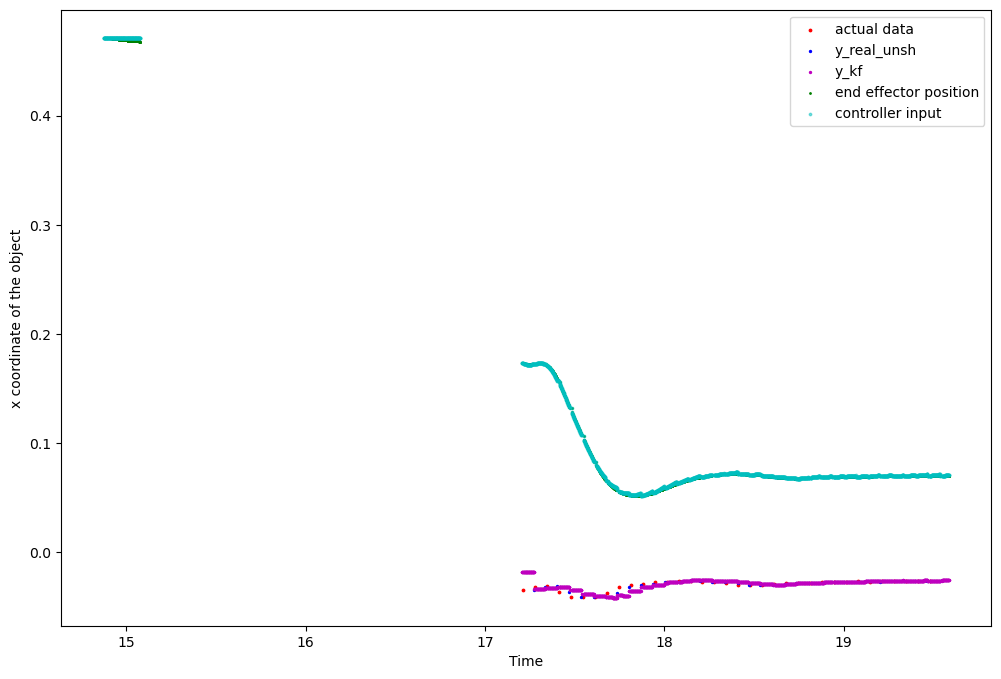

In [4]:
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_r, z_real_sh, color='r', label='actual data', s=3)
ax.scatter(t_s, z_real_unsh, color='b', label='y_real_unsh', s=2)
ax.scatter(t_kf, z_kf, color='m', label='y_kf', s=2)
ax.scatter(t_ee, z_ee, color='g', label='end effector position', s=1)
ax.scatter(t_d, z_d, color='c', label='controller input', s=3, alpha=0.5)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

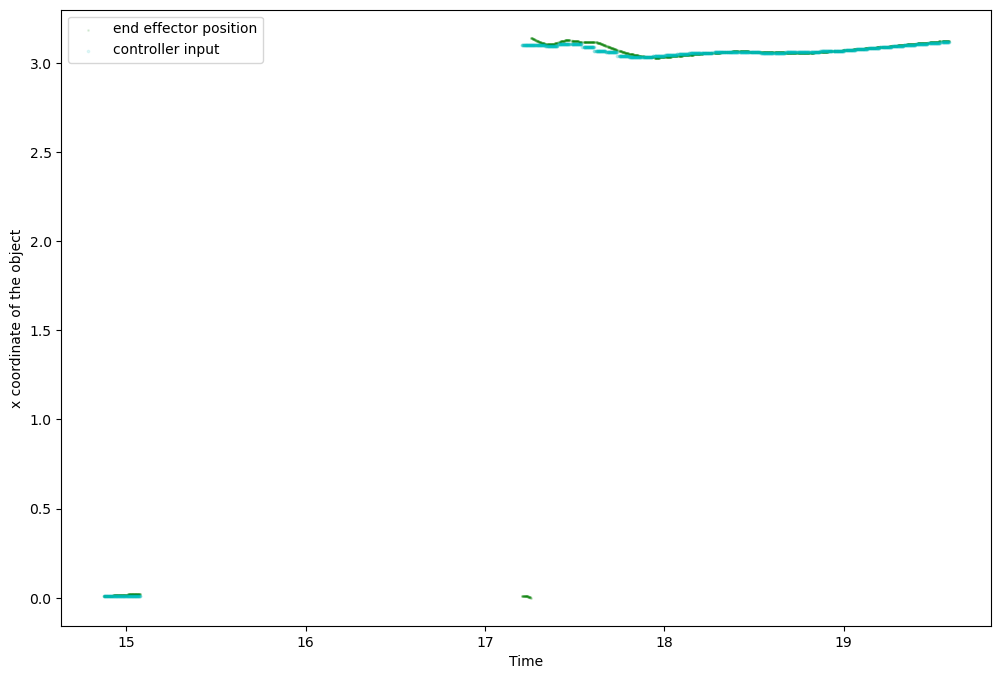

In [5]:
fig, ax = plt.subplots(figsize=(12,8))


#ax.scatter(t_r, roll_real_sh, color='r', label='actual data', s=3)
#ax.scatter(t_s, roll_real_unsh, color='b', label='x_real_unsh', s=2)
ax.scatter(t_ee, roll_ee, color='g', label='end effector position', s=1, alpha=0.1)
ax.scatter(t_d, roll_d, color='c', label='controller input', s=3, alpha=0.1)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

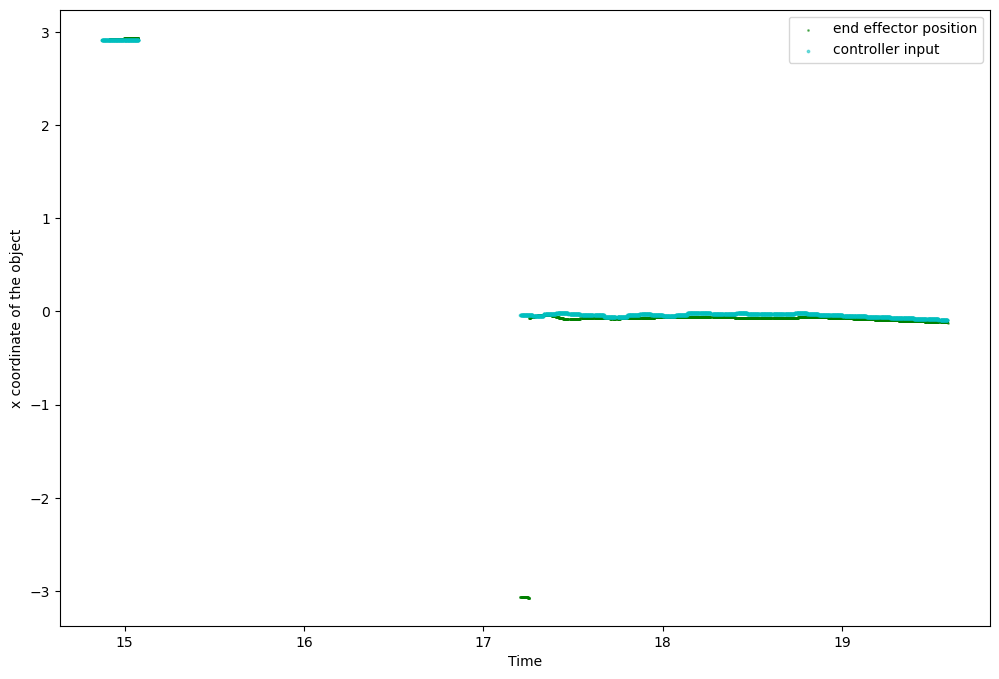

In [6]:
fig, ax = plt.subplots(figsize=(12,8))


#ax.scatter(t_r, pitch_real_sh, color='r', label='actual data', s=3)
#ax.scatter(t_s, pitch_real_unsh, color='b', label='x_real_unsh', s=2)
ax.scatter(t_ee, pitch_ee, color='g', label='end effector position', s=1, alpha=0.5)
ax.scatter(t_d, pitch_d, color='c', label='controller input', s=3, alpha=0.5)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

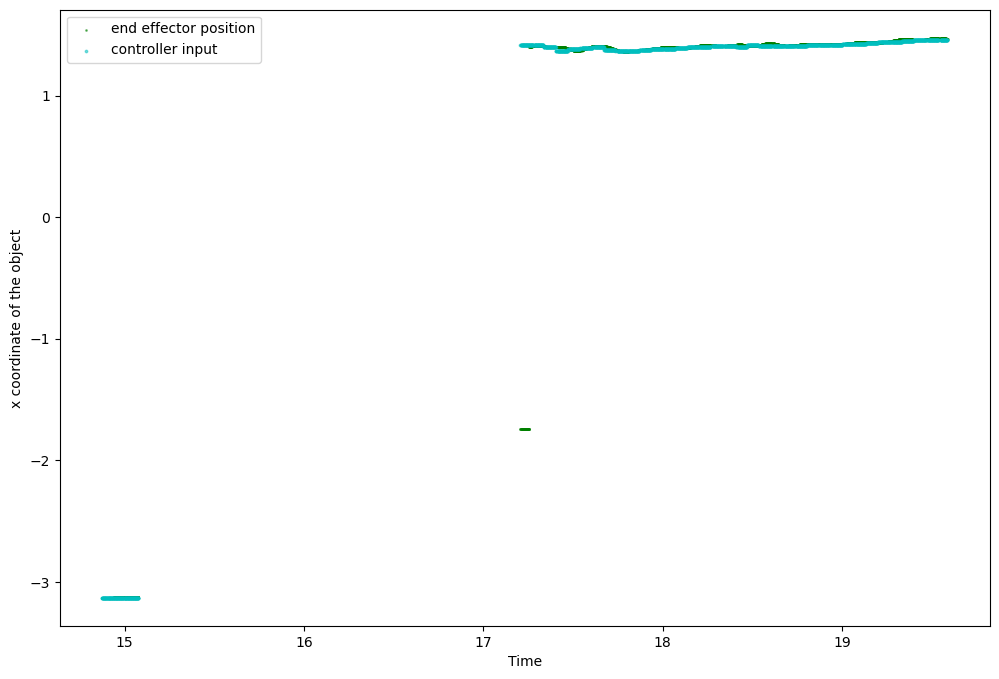

In [7]:
fig, ax = plt.subplots(figsize=(12,8))


#ax.scatter(t_r, yaw_real_sh, color='r', label='actual data', s=3)
#ax.scatter(t_s, yaw_real_unsh, color='b', label='x_real_unsh', s=2)
ax.scatter(t_ee, yaw_ee, color='g', label='end effector position', s=1, alpha=0.5)
ax.scatter(t_d, yaw_d, color='c', label='controller input', s=3, alpha=0.5)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

In [8]:
dummy test: 0 39
RB ind1: 7.13872 0 -1
past state 7.195 3.16202e-322 3.21143e-322     -450.605


SyntaxError: invalid syntax (354946839.py, line 1)

In [9]:
torques = list()
for i in open("/dev/shm/tq_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    torques.append(np.array([float(i) for i in data]))
    
torques = np.array(torques)  
torques_ff = list()
for i in open("/dev/shm/tq_ff_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    torques_ff.append(np.array([float(i) for i in data]))

torques_ff = np.array(torques_ff)  



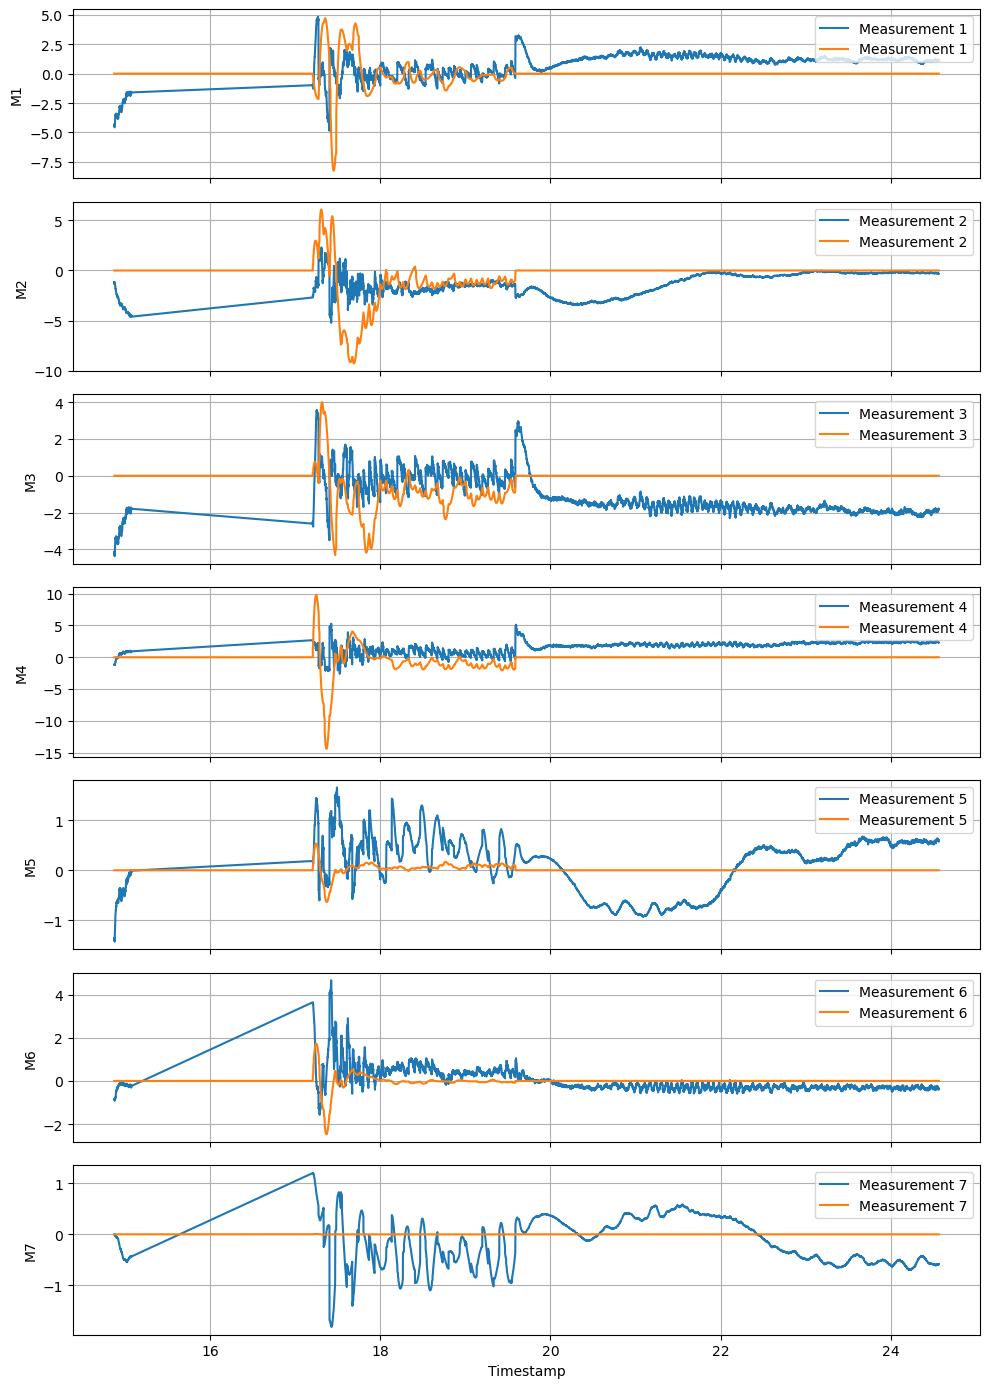

In [10]:
timestamps = torques[:, 0]
measurements = torques[:, 1:]
measurements1 = torques_ff[:, 1:]

# Create 7 subplots (one for each measurement)
fig, axes = plt.subplots(7, 1, figsize=(10, 14), sharex=True)

for i in range(7):
    axes[i].plot(timestamps, measurements[:, i], label=f'Measurement {i+1}')
    axes[i].plot(timestamps, measurements1[:, i], label=f'Measurement {i+1}')
    axes[i].set_ylabel(f'M{i+1}')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.tight_layout()
plt.show()